# Case Study - Happy Deliveries (a food delivery company)

## Contents:
- [Project Overview](#overview)
- [Data Cleaning](#clean)
- [Exploratory Data Analysis](#EDA)
- [Conclusion](#conclusion)
- [Resources](#resources)

<a id='overview'></a>
## Project Overview

The project will use the data from Happy Deliveries, a food delivery business based in Ireland. The competition in the food delivery industry is tough, hence the company aims to utilize their data to in order to gain advantage over its competitors. 

### Project Goal

The goal of the project is to provide answers and solutions to the following questions / tasks:

1. [Compare the monthly sales from 2021 to 2022 and determine whether the sales have grown.](#Q1)<br><br>
2. [Looking to the loyalty card holders, what is the age distribution of those customers?](#Q2)<br><br>
3. [Is there a relationship between the amount spend by a loyalty card holder and their age?](#Q3)<br><br>
4. I[s there a relationship between the amount of a payment, the age of a person and whether or not they used discount codes.](#Q4)<br><br>
5. [Compare the sales for 2022 across all regions.](#Q5)<br><br>
6. [Christmas is coming and Happy Deliveries want to reward their high spending customers. Who are the top 10 highest spending customers in 2022? Find their ID, name and email address for the marketing department to contact them with a reward.](#Q6)<br><br>
7. [In order to keep up with the anticipated increase in sales over Christmas, Happy Deliveries want to find what are the top 3 restaurants, so they can allocate their resources more efficiently. What are the top 3 restaurants in terms of sales for 2022?](#Q7)<br><br>
8. [The marketing department wants to reach out to non-returning loyalty card customers from 2021 in hopes they can lower their customer churn rate. Find all the customers who are considered non-returning including their id, name and email. (HINT: Non-returning means they have only made only one purchase)](#Q8)<br><br>
9. [The sales team want to find out if the discount code ‘BLACKFRIDAY22’ was as successful as last years ‘BLACKFRIDAY21’. Find the total amount of sales from both discount codes.](#Q9)<br><br>
10. [What were the locations with the lowest cumulative sales for 2022? Should the marketing department tailor their marketing efforts more towards this location (Perhaps other factors are responsible for example low population)](#Q10)<br><br>

### Datasets and Attributes

There are two datasets: ``orders`` and ``customers``. 

The ``orders`` dataset contains details of orders placed with Happy Deliveries from 2021 & 2022. It contains 998 records with the following attributes:

1. ``order_id``: Unique ID of order
2. ``order_timestamp``: Timestamp for when the customer placed the order.
3. ``delivered_timestamp``: Timestamp for when the order was delivered.
4. ``driver_id``: ID of the delivery driver.
5. ``restaurant_id``: ID of the restaurant ordered from.
6. ``cust_id``: ID of the customer who placed the order.
7. ``delivery_region``: County in Ireland the order was delivered.
8. ``discount_applied``: True or False whether or not the customer applied a discount to the order
9. ``discount_code``: Discount code applied, note that not all orders have discounts applied.
10. ``order_total``: Cost of the order before discount in Euros (€)
11. ``discount_pc``: Percentage discount
12. ``status``: The status of the delivery, whether it was successfull ydelivered or not.

The ``customers`` dataset contains loyalty card customers of Happy Deliveries which contains customer details. It has 406 records with the following attributes:

1. ``id``: Unique ID of customer
2. ``first_name``: Customer's first name.
3. ``last_name``: Customer's last name.
4. ``age``: Age of customer.
5. ``city``: City in Ireland where customer is based, note customer's city may be different from their ‘delivery_region’
6. ``email``: Email address of customer.

### Project Scope
1. Data Cleaning/Preprocessing<br> 
2. Exploratory Data Analysis<br> 
3. Conclusion
4. Resources

<a id='clean'></a>
## Data Cleaning

In [1]:
# import the necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
from datetime import timedelta

import warnings
warnings.filterwarnings('ignore')

### Load the datasets, describe the properties, perform necessary cleaning 

In [2]:
# load the datasets 

orders_df = pd.read_csv('../data/hd_orders.csv')
customers_df = pd.read_excel('../data/hd_customers.xlsx')

In [3]:
orders_df.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED


In [4]:
customers_df.head()

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com
3,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com
4,1005,Carly,Armstrong,22,Mayo,CArmstrong@mail.com


In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             998 non-null    int64  
 1   order_timestamp      998 non-null    object 
 2   delivered_timestamp  991 non-null    object 
 3   driver_id            998 non-null    int64  
 4   restaurant_id        998 non-null    int64  
 5   cust_id              998 non-null    int64  
 6   delivery_region      998 non-null    object 
 7   discount_applied     998 non-null    bool   
 8   discount_code        92 non-null     object 
 9   order_total          998 non-null    float64
 10  discount_pc          92 non-null     float64
 11  status               998 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 86.9+ KB


In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          406 non-null    int64 
 1   first_name  406 non-null    object
 2   last_name   406 non-null    object
 3   age         406 non-null    int64 
 4   city        406 non-null    object
 5   email       406 non-null    object
dtypes: int64(2), object(4)
memory usage: 19.2+ KB


In [7]:
orders_df.describe()

,order_id,driver_id,restaurant_id,cust_id,order_total,discount_pc
count,998.000000,998.000000,998.000000,998.000000,998.000000,92.000000
mean,100499.500000,220.905812,107.080160,1174.692385,27.141994,17.717391
std,288.242086,103.302737,96.580998,117.393134,10.927458,4.220114
min,100001.000000,7.000000,2.000000,1001.000000,8.160000,10.000000
25%,100250.250000,144.000000,20.000000,1062.250000,19.540000,20.000000
50%,100499.500000,224.000000,82.000000,1172.000000,26.415000,20.000000
75%,100748.750000,312.750000,188.000000,1276.000000,34.207500,20.000000
max,100998.000000,434.000000,383.000000,1406.000000,107.030000,20.000000


In [8]:
customers_df.describe()

,id,age
count,406.000000,406.000000
mean,1203.500000,29.354680
std,117.346353,14.347274
min,1001.000000,6.000000
25%,1102.250000,22.000000
50%,1203.500000,26.000000
75%,1304.750000,31.000000
max,1406.000000,160.000000


In [9]:
# From the orders_df, convert the columns order_id, driver_id, restaurant_id, and cust_id from int to string

target_cols = ['order_id', 'driver_id', 'restaurant_id', 'cust_id']
orders_df[target_cols] = orders_df[target_cols].astype('str')
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             998 non-null    object 
 1   order_timestamp      998 non-null    object 
 2   delivered_timestamp  991 non-null    object 
 3   driver_id            998 non-null    object 
 4   restaurant_id        998 non-null    object 
 5   cust_id              998 non-null    object 
 6   delivery_region      998 non-null    object 
 7   discount_applied     998 non-null    bool   
 8   discount_code        92 non-null     object 
 9   order_total          998 non-null    float64
 10  discount_pc          92 non-null     float64
 11  status               998 non-null    object 
dtypes: bool(1), float64(2), object(9)
memory usage: 86.9+ KB


In [10]:
# From the orders_df, convert order_timestamp and delivered_timestamp columns to datetime

date_cols= ['order_timestamp', 'delivered_timestamp']
orders_df[date_cols] = orders_df[date_cols].apply(pd.to_datetime)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             998 non-null    object        
 1   order_timestamp      998 non-null    datetime64[ns]
 2   delivered_timestamp  991 non-null    datetime64[ns]
 3   driver_id            998 non-null    object        
 4   restaurant_id        998 non-null    object        
 5   cust_id              998 non-null    object        
 6   delivery_region      998 non-null    object        
 7   discount_applied     998 non-null    bool          
 8   discount_code        92 non-null     object        
 9   order_total          998 non-null    float64       
 10  discount_pc          92 non-null     float64       
 11  status               998 non-null    object        
dtypes: bool(1), datetime64[ns](2), float64(2), object(7)
memory usage: 86.9+ KB


In [11]:
# From the customers_df, convert id from int to string

customers_df['id'] = customers_df['id'].astype('str')
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          406 non-null    object
 1   first_name  406 non-null    object
 2   last_name   406 non-null    object
 3   age         406 non-null    int64 
 4   city        406 non-null    object
 5   email       406 non-null    object
dtypes: int64(1), object(5)
memory usage: 19.2+ KB


In [12]:
# check the orders_df for null values

orders_df.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      7
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          906
order_total              0
discount_pc            906
status                   0
dtype: int64

In [13]:
orders_df['discount_code'].value_counts()

BLACKFRIDAY22    46
BLACKFRIDAY21    25
HAPPYBIRTHDAY    21
Name: discount_code, dtype: int64

In [14]:
orders_df['discount_pc'].value_counts()

20.0    71
10.0    21
Name: discount_pc, dtype: int64

> **There are 7 null values in ``delivered_timestamp`` column, 906 values for ``discount_code`` and ``discount_pc`` columns.**

In [15]:
# Fill the missing values on discount_code with NODISC

orders_df['discount_code'] = orders_df['discount_code'].fillna('NODISC')
orders_df['discount_code'].value_counts()

NODISC           906
BLACKFRIDAY22     46
BLACKFRIDAY21     25
HAPPYBIRTHDAY     21
Name: discount_code, dtype: int64

In [16]:
# Fill the missing values on discount_pc with 0

orders_df['discount_pc'] = orders_df['discount_pc'].fillna(0)
orders_df['discount_pc'].value_counts()

0.0     906
20.0     71
10.0     21
Name: discount_pc, dtype: int64

In [17]:
# check the records with null values on delivered_timestamp

orders_df[orders_df['delivered_timestamp'].isnull()]

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
30,100031,2021-07-22 23:42:00,NaT,66,63,1081,Cork,False,NODISC,42.87,0.0,CANCELLED
64,100065,2021-02-03 20:12:00,NaT,204,241,1153,Dublin,False,NODISC,39.11,0.0,CANCELLED
116,100117,2021-10-17 17:34:00,NaT,232,188,1190,Kerry,False,NODISC,33.02,0.0,CANCELLED
175,100176,2021-08-10 18:11:00,NaT,216,20,1363,Cork,False,NODISC,28.62,0.0,CANCELLED
206,100207,2021-10-11 21:35:00,NaT,353,3,1393,Dublin,False,NODISC,25.03,0.0,CANCELLED
241,100242,2021-01-01 20:16:00,NaT,288,233,1285,Dublin,False,NODISC,22.73,0.0,CANCELLED
954,100955,2022-12-15 17:03:00,NaT,368,104,1073,Sligo,False,NODISC,29.33,0.0,CANCELLED


> **Note that the records with no ``delivered_timestamp`` are CANCELLED orders.**

In [18]:
# Count how many orders the discount was applied to

orders_df['discount_applied'].value_counts()

False    906
True      92
Name: discount_applied, dtype: int64

> **There are 92 orders the discount was applied to.**

In [19]:
# Count the number of orders with discount_codes

len(orders_df[orders_df['discount_code'] != 'NODISC'])

92

> **There are 92 orders with ``discount_code`` which means our records are consistent.**

In [20]:
# Check the date range of orders and delivery

print('Earliest order date is', orders_df['order_timestamp'].min())
print('Latest order date is', orders_df['order_timestamp'].max())
print('-' * 50)
print('Earliest delivery date is', orders_df['delivered_timestamp'].min())
print('Latest delivery date is', orders_df['delivered_timestamp'].max())

Earliest order date is 2021-01-01 20:16:00
Latest order date is 2022-12-29 23:56:00
--------------------------------------------------
Earliest delivery date is 2021-01-02 21:27:00
Latest delivery date is 2022-12-30 00:32:00


In [21]:
# Check for duplicate records for both orders_df and customers_df

print(orders_df.duplicated().sum())
print(customers_df.duplicated().sum())

0
0


In [22]:
# Check for outliers

orders_df.describe()

,order_total,discount_pc
count,998.000000,998.000000
mean,27.141994,1.633267
std,10.927458,5.284084
min,8.160000,0.000000
25%,19.540000,0.000000
50%,26.415000,0.000000
75%,34.207500,0.000000
max,107.030000,20.000000


In [23]:
# Check for outliers

customers_df.describe()

,age
count,406.000000
mean,29.354680
std,14.347274
min,6.000000
25%,22.000000
50%,26.000000
75%,31.000000
max,160.000000


> **It shows that the minimum and maximum age for loyalty cardholders are 6 and 160 respectively, which is unusual.**

In [24]:
# Check for customers whose ages are below 18 and over 80

customers_df[(customers_df['age'] < 18) | (customers_df['age'] > 80)]

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
30,1031,Jessica,Hendricks,150,Dublin,Jessica.H85@xfinity.com
59,1060,Amy,Farmer,8,Kerry,Farmer.Amy@verizon.com
70,1071,David,Gibson,160,Dublin,DavidGibson@xfinity.com
102,1103,Andrew,Craig,6,Dublin,Andrew.C74@yahoo.com
164,1165,Christopher,Ramsey,6,Waterford,Ramsey_Christopher@hotmail.com


> **There are 6 customers who are of unusual ages (6, 8, 139, 150, 160), which was probably caused by an input error.**

In [25]:
# Create a df for customers with valid ages

valid_age = customers_df['age'].between(18, 80)
cust_clean_df = customers_df.loc[valid_age, :]
cust_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 405
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          400 non-null    object
 1   first_name  400 non-null    object
 2   last_name   400 non-null    object
 3   age         400 non-null    int64 
 4   city        400 non-null    object
 5   email       400 non-null    object
dtypes: int64(1), object(5)
memory usage: 21.9+ KB


In [26]:
cust_clean_df.describe()

,age
count,400.000000
mean,28.622500
std,9.753863
min,18.000000
25%,22.000000
50%,26.000000
75%,31.000000
max,75.000000


> **Now, the ages are between 18 and 75.**

In [27]:
# Check how many orders were completed.

orders_df['status'].value_counts()

COMPLETED    991
CANCELLED      7
Name: status, dtype: int64

In [28]:
# Create a df to include only completed orders

sales_df = orders_df.loc[orders_df['status'] == 'COMPLETED']
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 997
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             991 non-null    object        
 1   order_timestamp      991 non-null    datetime64[ns]
 2   delivered_timestamp  991 non-null    datetime64[ns]
 3   driver_id            991 non-null    object        
 4   restaurant_id        991 non-null    object        
 5   cust_id              991 non-null    object        
 6   delivery_region      991 non-null    object        
 7   discount_applied     991 non-null    bool          
 8   discount_code        991 non-null    object        
 9   order_total          991 non-null    float64       
 10  discount_pc          991 non-null    float64       
 11  status               991 non-null    object        
dtypes: bool(1), datetime64[ns](2), float64(2), object(7)
memory usage: 93.9+ KB


In [29]:
# Extract year, month name, and month-year period from the delivered_timestamp

sales_df['sales_year'] = sales_df['delivered_timestamp'].dt.year
sales_df['sales_month'] = sales_df['delivered_timestamp'].dt.month_name()
sales_df['sales_period'] = sales_df['delivered_timestamp'].dt.to_period('M')
sales_df.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,sales_year,sales_month,sales_period
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,2021,November,2021-11
1,100002,2021-11-07 21:23:00,2021-11-07 21:53:00,43,219,1017,Cork,False,NODISC,69.40,0.0,COMPLETED,2021,November,2021-11
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,NODISC,47.16,0.0,COMPLETED,2021,April,2021-04
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,NODISC,47.15,0.0,COMPLETED,2021,February,2021-02
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,NODISC,47.00,0.0,COMPLETED,2021,June,2021-06


<a id='EDA'></a>
## Exploratory Data Analysis

<a id='Q1'></a>
### 1. Compare the monthly sales from 2021 to 2022 and determine whether the sales have grown.

In [30]:
# Calculate total sales for each month

monthly_sales = sales_df.groupby(['sales_period'])['order_total'].sum().reset_index()
monthly_sales

,sales_period,order_total
0,2021-01,255.54
1,2021-02,570.46
2,2021-03,704.60
3,2021-04,906.21
4,2021-05,741.43
5,2021-06,939.01
6,2021-07,803.54
7,2021-08,1076.50
8,2021-09,722.53
9,2021-10,724.12


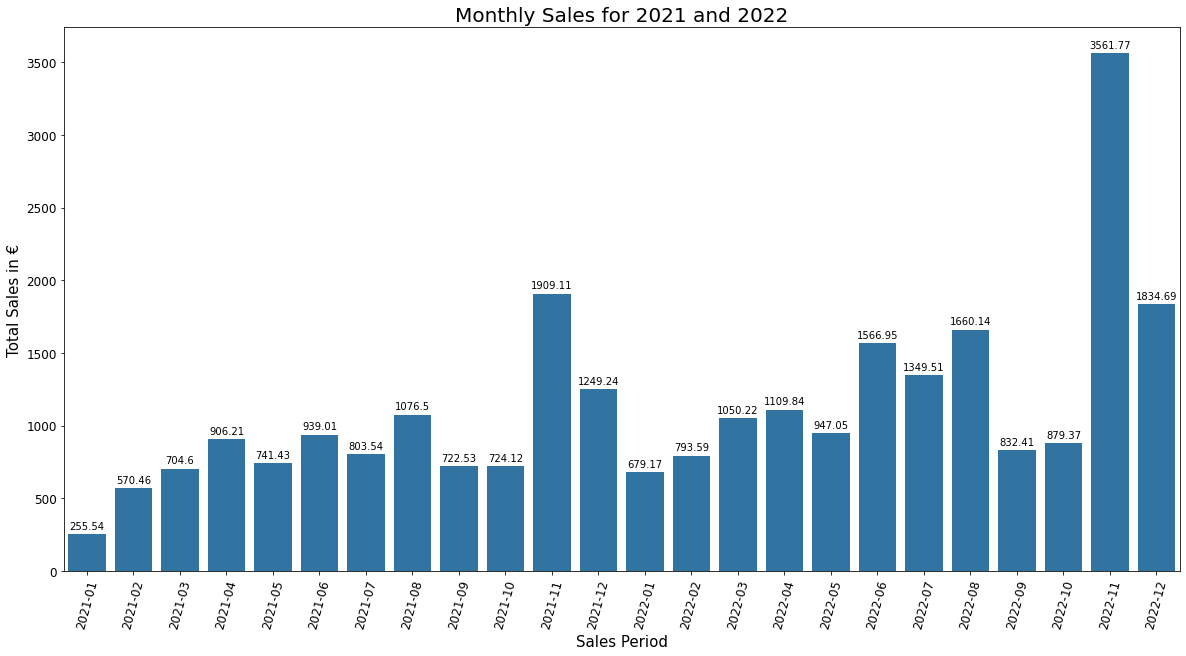

In [31]:
# Visualize monthly sales

plt.figure(figsize = [20, 10])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = 'sales_period', y = 'order_total', data = monthly_sales, color = base_color)

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.xticks(rotation = 75)
plt.title('Monthly Sales for 2021 and 2022', size = 20)
plt.xlabel('Sales Period', size = 15)
plt.ylabel('Total Sales in €', size = 15)

plt.show()

In [32]:
# convert sales_month column from a plain object type into an ordered categorical type 

ordered_month = pd.api.types.CategoricalDtype(categories = ['January', 'February', 'March', 'April', 'May', 'June',
                                     'July', 'August', 'September', 'October', 'November', 'December'], ordered = True)

sales_df['sales_month'] = sales_df['sales_month'].astype(ordered_month)

In [33]:
# Calculate monthly sales

monthly_sales2 = sales_df.groupby(['sales_year', 'sales_month'])['order_total'].sum().reset_index()
monthly_sales2

,sales_year,sales_month,order_total
0,2021,January,255.54
1,2021,February,570.46
2,2021,March,704.60
3,2021,April,906.21
4,2021,May,741.43
5,2021,June,939.01
6,2021,July,803.54
7,2021,August,1076.50
8,2021,September,722.53
9,2021,October,724.12


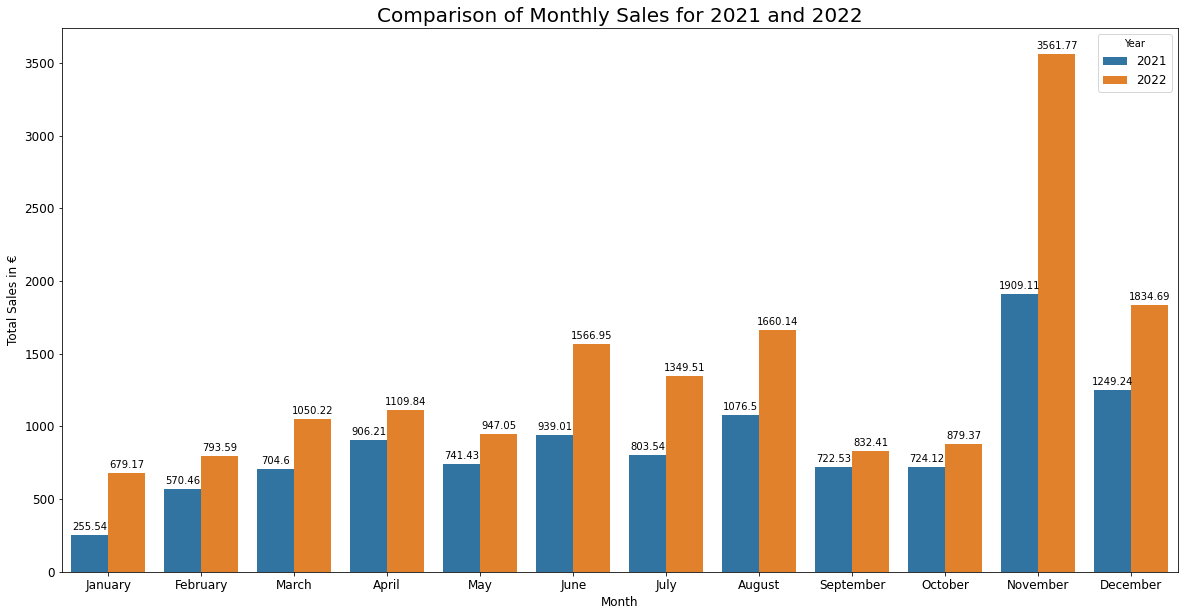

In [34]:
# Visualize sales per month with year comparison

plt.figure(figsize = [20, 10])

ax = sns.barplot(data = monthly_sales2, x = 'sales_month', y = 'order_total', hue = 'sales_year', errwidth = 0)

ax.legend(title = 'Year', fontsize = 12)
ax.tick_params(axis='both', which='major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)
ax.bar_label(ax.containers[1], padding = 3)

plt.title('Comparison of Monthly Sales for 2021 and 2022', size = 20)
plt.xlabel('Month', size = 12)
plt.ylabel('Total Sales in €', size = 12)

plt.show()

> **Based on the two barplots, it shows that the monthly sales of Happy Deliveries have increased from 2021 to 2022. It is also notable that the highest sales was generated in the month of November for both years.**

<a id='Q2'></a>
### 2. Looking at the loyalty card holders, what is the age distribution of those customers?

In [35]:
cust_clean_df.describe()

,age
count,400.000000
mean,28.622500
std,9.753863
min,18.000000
25%,22.000000
50%,26.000000
75%,31.000000
max,75.000000


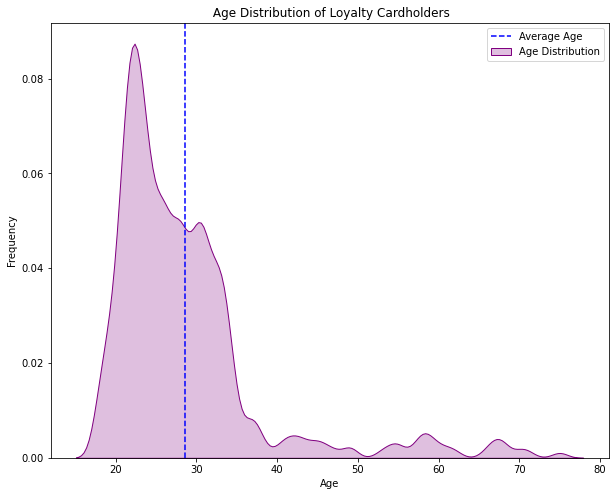

In [36]:
# Plot distribution of age using density plot

plt.figure(figsize=[10,8])

sns.kdeplot(cust_clean_df['age'], label = 'Age Distribution', color = 'purple', shade = True, bw = .1)

plt.axvline(x = cust_clean_df['age'].mean(), color = 'blue', linestyle = '--', label = 'Average Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(' Age Distribution of Loyalty Cardholders')
plt.legend()
plt.show();

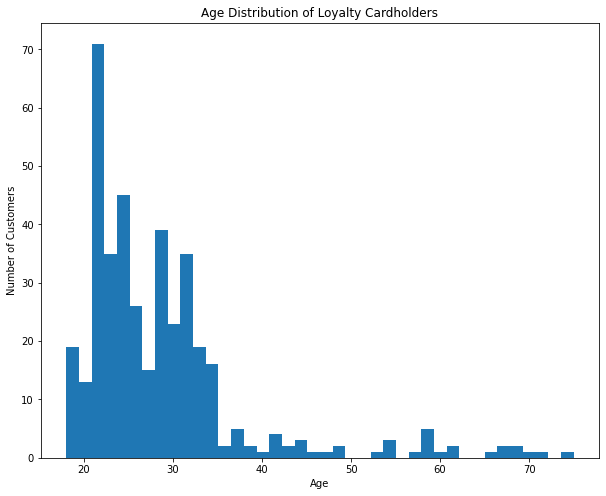

In [37]:
# Plot distribution of age using histogram

plt.figure(figsize = [10, 8])
plt.hist(data = cust_clean_df, x = 'age', bins = 40)
plt.title('Age Distribution of Loyalty Cardholders')
plt.xlabel('Age');
plt.ylabel('Number of Customers');

Text(0, 0.5, 'Number of Customers')

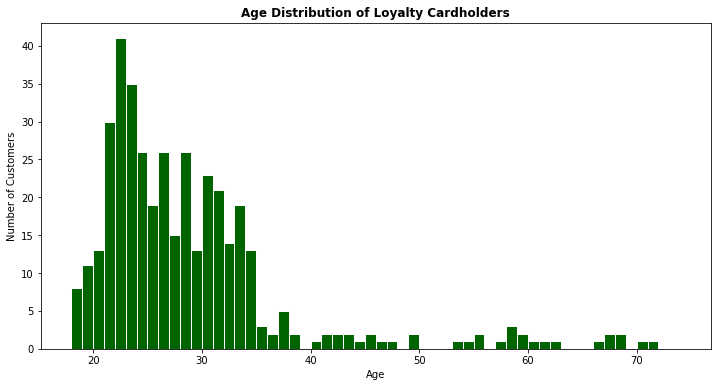

In [38]:
# Plot distribution of age using histogram

fig = plt.figure(figsize = [12, 6])

ax = fig.add_subplot()

ax.hist(cust_clean_df['age'], bins = np.arange(cust_clean_df['age'].min(), cust_clean_df['age'].max(), 1), 
        color = 'darkgreen', edgecolor = 'white')

ax.set_title('Age Distribution of Loyalty Cardholders', fontweight ='bold')

ax.set_xlabel('Age')
ax.set_ylabel('Number of Customers')

> **Based on the density plot and histogram, the age has a normal distribution with few outliers. The ages are mostly spread between 22 and 35.**

<a id='Q3'></a>
### 3. Is there a relationship between the amount spend by a loyalty card holder and their age?

In [39]:
# Merge sales_df and cust_clean_df using left join

left_merged = pd.merge(sales_df, cust_clean_df, left_on = 'cust_id', right_on = 'id', how = 'left')

In [40]:
left_merged.isnull().sum()

order_id                0
order_timestamp         0
delivered_timestamp     0
driver_id               0
restaurant_id           0
cust_id                 0
delivery_region         0
discount_applied        0
discount_code           0
order_total             0
discount_pc             0
status                  0
sales_year              0
sales_month             0
sales_period            0
id                     19
first_name             19
last_name              19
age                    19
city                   19
email                  19
dtype: int64

In [41]:
left_merged[left_merged['id'].isnull()]

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,sales_year,sales_month,sales_period,id,first_name,last_name,age,city,email
40,100042,2021-08-26 18:30:00,2021-08-26 19:00:00,229,27,1103,Cork,False,NODISC,41.24,...,COMPLETED,2021,August,2021-08,NaN,NaN,NaN,NaN,NaN,NaN
164,100168,2021-08-22 23:06:00,2021-08-22 23:36:00,99,83,1031,Cork,False,NODISC,28.78,...,COMPLETED,2021,August,2021-08,NaN,NaN,NaN,NaN,NaN,NaN
336,100343,2021-07-27 18:24:00,2021-07-27 18:54:00,139,57,1031,Kerry,False,NODISC,15.29,...,COMPLETED,2021,July,2021-07,NaN,NaN,NaN,NaN,NaN,NaN
366,100373,2021-12-23 18:10:00,2021-12-23 18:37:00,137,83,1060,Dublin,False,NODISC,12.45,...,COMPLETED,2021,December,2021-12,NaN,NaN,NaN,NaN,NaN,NaN
378,100385,2021-11-26 23:35:00,2021-11-27 00:02:00,245,96,1071,Dublin,True,BLACKFRIDAY21,10.49,...,COMPLETED,2021,November,2021-11,NaN,NaN,NaN,NaN,NaN,NaN
433,100440,2022-01-03 20:27:00,2022-01-03 21:03:00,317,297,1103,Cork,False,NODISC,29.58,...,COMPLETED,2022,January,2022-01,NaN,NaN,NaN,NaN,NaN,NaN
436,100443,2022-04-03 20:07:00,2022-04-03 20:43:00,345,69,1060,Cork,False,NODISC,23.35,...,COMPLETED,2022,April,2022-04,NaN,NaN,NaN,NaN,NaN,NaN
625,100632,2022-07-17 22:01:00,2022-07-17 22:34:00,259,20,1031,Cork,False,NODISC,19.54,...,COMPLETED,2022,July,2022-07,NaN,NaN,NaN,NaN,NaN,NaN
677,100684,2022-08-20 17:29:00,2022-08-20 18:02:00,87,360,1071,Dublin,False,NODISC,43.41,...,COMPLETED,2022,August,2022-08,NaN,NaN,NaN,NaN,NaN,NaN
684,100691,2022-08-24 17:14:00,2022-08-24 17:47:00,222,9,1031,Dublin,False,NODISC,45.69,...,COMPLETED,2022,August,2022-08,NaN,NaN,NaN,NaN,NaN,NaN


> **It appears that there are 19 records that do not have customer details. To answer question 3, the sales_df and cust_clean_df will be merged using inner join.**

In [42]:
# Merge sales_df and cust_clean_df using inner join

sales_cust_df = pd.merge(sales_df, cust_clean_df, left_on = 'cust_id', right_on = 'id', how = 'inner')
sales_cust_df.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,sales_year,sales_month,sales_period,id,first_name,last_name,age,city,email
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,...,COMPLETED,2021,November,2021-11,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
1,100328,2021-05-06 20:38:00,2021-05-06 21:08:00,351,140,1016,Dublin,False,NODISC,16.55,...,COMPLETED,2021,May,2021-05,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
2,100500,2022-04-30 21:03:00,2022-04-30 21:39:00,175,48,1016,Dublin,False,NODISC,46.62,...,COMPLETED,2022,April,2022-04,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
3,100753,2022-02-11 19:15:00,2022-02-11 19:49:00,168,321,1016,Galway,False,NODISC,26.66,...,COMPLETED,2022,February,2022-02,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
4,100002,2021-11-07 21:23:00,2021-11-07 21:53:00,43,219,1017,Cork,False,NODISC,69.40,...,COMPLETED,2021,November,2021-11,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com


In [43]:
# Compute correlation coefficient of age and amount spend

x = sales_cust_df['age']
y = sales_cust_df['order_total']

pearsons_coefficient = np.corrcoef(x, y)
print("The pearson's coeffient of the age and amount spend are: \n" , pearsons_coefficient)

The pearson's coeffient of the age and amount spend are: 
 [[ 1.         -0.04265493]
 [-0.04265493  1.        ]]


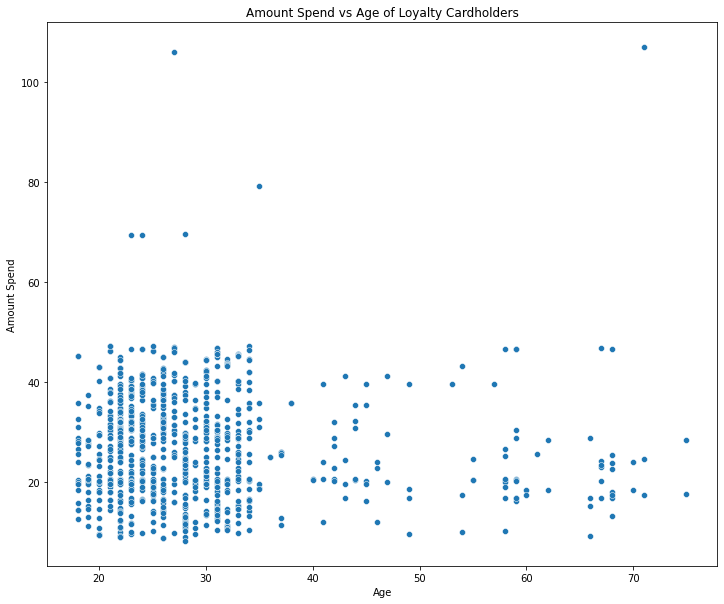

In [44]:
# plot the relationship between age and amount spend using scatterplot

plt.figure(figsize = [12, 10])

ax = sns.scatterplot(x = 'age', y = 'order_total', palette = 'muted', data = sales_cust_df)

plt.title('Amount Spend vs Age of Loyalty Cardholders')
plt.xlabel('Age')
plt.ylabel('Amount Spend');

> **The correlation coefficient is ``-0.04`` which means that there is a weak negative correlation between age and amount spend. Based on the scatterplot, majority of sales are for products priced between 10 and 45 € purchased by young customers aged below 35.**

<a id='Q4'></a>
### 4. Is there a relationship between the amount of a payment, the age of a person and whether or not they used discount codes 

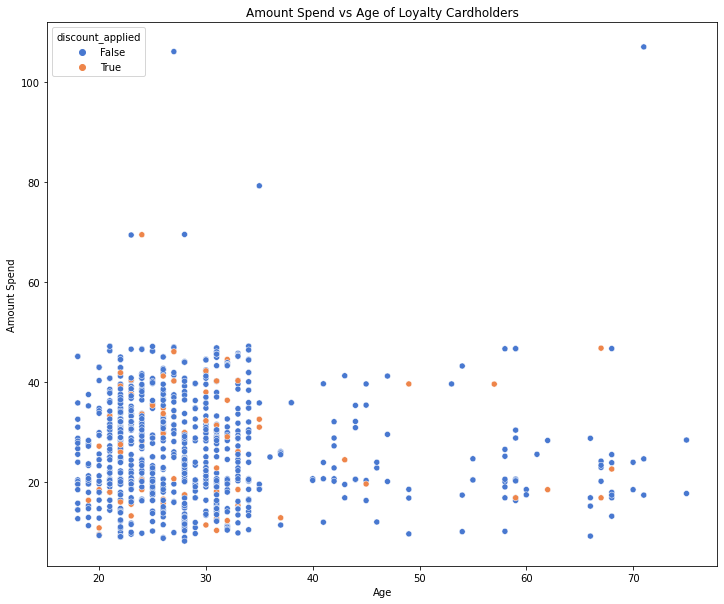

In [45]:
plt.figure(figsize = [12, 10])

ax = sns.scatterplot(x = 'age', y = 'order_total', hue = 'discount_applied', palette = 'muted', data = sales_cust_df)

plt.title('Amount Spend vs Age of Loyalty Cardholders')
plt.xlabel('Age')
plt.ylabel('Amount Spend');

> **Majority of the customers who used the discount codes are aged below 35 and amount spend costs between 10 and 45 €.**

<a id='Q5'></a>
### 5. Compare the sales for 2022 across all regions

In [46]:
# Create a df for 2022 sales

sales_2022 = sales_df[sales_df['sales_year'] == 2022]
sales_2022.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,sales_year,sales_month,sales_period
400,100401,2022-03-01 17:06:00,2022-03-01 17:39:00,290,178,1155,Dublin,False,NODISC,31.99,0.0,COMPLETED,2022,March,2022-03
401,100402,2022-04-01 17:41:00,2022-04-01 18:20:00,174,183,1014,Dublin,False,NODISC,28.78,0.0,COMPLETED,2022,April,2022-04
402,100403,2022-08-01 20:11:00,2022-08-01 20:44:00,214,213,1198,Dublin,False,NODISC,31.07,0.0,COMPLETED,2022,August,2022-08
403,100404,2022-12-01 18:16:00,2022-12-01 18:49:00,200,47,1002,Dublin,False,NODISC,20.63,0.0,COMPLETED,2022,December,2022-12
404,100405,2022-12-01 18:41:00,2022-12-01 19:17:00,355,8,1249,Dublin,False,NODISC,30.47,0.0,COMPLETED,2022,December,2022-12


In [47]:
# Calculate 2022 sales by region

sales2022_by_region = sales_2022.groupby(['delivery_region'])['order_total'].sum().reset_index()
sales2022_by_region

,delivery_region,order_total
0,Cork,3540.83
1,Dublin,7192.81
2,Galway,2752.46
3,Kerry,1399.64
4,Leitrim,493.89
5,Sligo,885.08


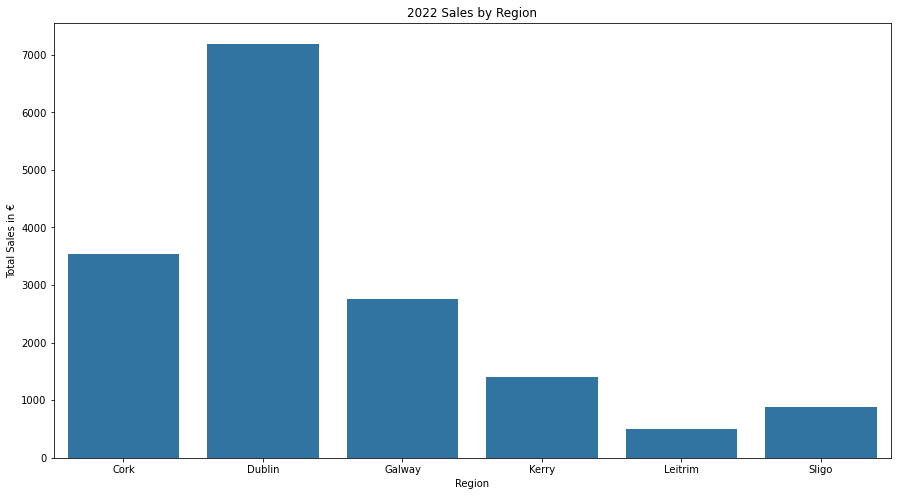

In [48]:
# Plot the 2022 sales by region

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]

sns.barplot(data = sales2022_by_region, x = 'delivery_region', y = 'order_total', color = base_color, errwidth = 0)
plt.title('2022 Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales in €')
plt.show()

> **The Dublin county has the highest sales and the Leitrim county has the lowest in 2022.**

<a id='Q6'></a>
### 6. Christmas is coming and Happy Deliveries want to reward their high spending customers. Who are the top 10 highest spending customers in 2022? Find their ID, name and email address for the marketing department to contact them with a reward.

In [49]:
# Get the top 10 sales per customer in 2022

top_10_sales = sales_2022.groupby(['cust_id'])['order_total'].sum()\
                                                             .reset_index()\
                                                             .sort_values('order_total', ascending = False)[:10]

top_10_sales

,cust_id,order_total
26,1027,151.05
124,1126,146.30
8,1009,131.64
22,1023,118.30
20,1021,115.13
17,1018,105.22
208,1227,103.94
27,1028,102.08
28,1029,99.81
58,1059,99.38


In [50]:
# Get the details of the top 10 customers in 2022

top_10_cust = pd.merge(top_10_sales, customers_df, left_on = 'cust_id', right_on = 'id', how = 'inner')
top_10_cust[['cust_id', 'order_total', 'first_name', 'last_name', 'email']]

,cust_id,order_total,first_name,last_name,email
0,1027,151.05,Jason,Dudley,Jason_D@zoho.com
1,1126,146.30,Deanna,Knight,DeannaKnight@protonmail.com
2,1009,131.64,Sheri,Aguilar,Aguilar.Sheri22@att.com
3,1023,118.30,Gabrielle,Morgan,GMorgan48@mail.com
4,1021,115.13,Joshua,Kidd,Joshua_K@att.com
5,1018,105.22,David,Snyder,David.S@hotmail.com
6,1227,103.94,Andrew,Cantu,Andrew_Cantu@yandex.com
7,1028,102.08,David,Murphy,Murphy.David@mail.com
8,1029,99.81,Meagan,Gonzalez,Gonzalez_Meagan43@mail.com
9,1059,99.38,Brent,Harrell,Harrell.Brent13@protonmail.com


<a id='Q7'></a>
### 7. In order to keep up with the anticipated increase in sales over Christmas, Happy Deliveries want to find what are the top 3 restaurants, so they can allocate their resources more efficiently. What are the top 3 restaurants in terms of sales for 2022? 

In [51]:
sales_2022.groupby(['restaurant_id'])['order_total'].sum().reset_index()[:3]

,restaurant_id,order_total
0,10,265.97
1,100,106.04
2,101,17.42


<a id='Q8'></a>
### 8: The marketing department wants to reach out to non-returning loyalty card customers from 2021 in hopes they can lower their customer churn rate. Find all the customers who are considered non-returning including their id, name, and email. (HINT: Non-returning means they have only made only one purchase)


In [52]:
# Create a df for sales 2021

sales_2021 = sales_df[sales_df['sales_year'] == 2021]
sales_2021.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,sales_year,sales_month,sales_period
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,2021,November,2021-11
1,100002,2021-11-07 21:23:00,2021-11-07 21:53:00,43,219,1017,Cork,False,NODISC,69.40,0.0,COMPLETED,2021,November,2021-11
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,NODISC,47.16,0.0,COMPLETED,2021,April,2021-04
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,NODISC,47.15,0.0,COMPLETED,2021,February,2021-02
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,NODISC,47.00,0.0,COMPLETED,2021,June,2021-06


In [53]:
# Calculate the number of purchases made by each customer in 2021

num_purch_per_cust = sales_2021.groupby(['cust_id'])['order_id'].count().to_frame('num_purchase').reset_index()

num_purch_per_cust

,cust_id,num_purchase
0,1009,1
1,1010,1
2,1011,1
3,1012,1
4,1013,3
...,...,...
287,1402,1
288,1403,1
289,1404,1
290,1405,1


In [54]:
# Filter only those whose number of purchase is 1

num_purch_per_cust[num_purch_per_cust['num_purchase'] == 1]

,cust_id,num_purchase
0,1009,1
1,1010,1
2,1011,1
3,1012,1
5,1014,1
...,...,...
287,1402,1
288,1403,1
289,1404,1
290,1405,1


> **Output shows that there are 221 customer who have made only 1 purchase in 2021.**

In [55]:
# Verify 

sales_df[sales_df['cust_id'] == '1011']

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,sales_year,sales_month,sales_period
324,100325,2021-08-22 18:18:00,2021-08-22 18:48:00,36,322,1011,Cork,True,HAPPYBIRTHDAY,16.82,10.0,COMPLETED,2021,August,2021-08
742,100743,2022-10-26 23:51:00,2022-10-27 00:24:00,366,221,1011,Dublin,False,NODISC,24.16,0.0,COMPLETED,2022,October,2022-10
862,100863,2022-11-26 20:09:00,2022-11-26 20:42:00,240,105,1011,Dublin,True,BLACKFRIDAY22,46.76,20.0,COMPLETED,2022,November,2022-11
915,100916,2022-02-12 20:19:00,2022-02-12 20:55:00,228,311,1011,Sligo,False,NODISC,23.33,0.0,COMPLETED,2022,February,2022-02


> **Upon checking from the original sales_df, it shows that customer 1011 has indeed made only 1 purchase in 2021 but made 3 purchases in 2022.**

<a id='Q9'></a>
### 9. The sales team want to find out if the discount code ‘BLACKFRIDAY22’ was as successful as last years ‘BLACKFRIDAY21’. Find the total amount of sales from both discount codes.

In [56]:
# Calculate the total sales made from discount codes

sales_df.groupby(['discount_code']).agg({
                                         'order_id': 'count',
                                         'order_total': 'sum'}) \
                                   .reset_index() \
                                   .rename(columns = {
                                                     'order_id': 'Number or Orders',
                                                     'order_total': 'Total Sales'})

,discount_code,Number or Orders,Total Sales
0,BLACKFRIDAY21,25,734.53
1,BLACKFRIDAY22,46,1211.22
2,HAPPYBIRTHDAY,21,605.66
3,NODISC,899,24315.59


> **Based on the output, BLACKFRIDAY22 made a total of 46 orders and € 1,211.22 in total sales as compared to BLACKFRIDAY21 which only has 25 orders and € 734.53 total sales. This shows that BLACKFRIDAY22 was more successful.**

<a id='Q10'></a>
### 10. What were the locations with the lowest cumulative sales for 2022? Should the marketing department tailor their marketing efforts more towards this location (Perhaps other factors are responsible for example low population) ?

In [57]:
# Calculate the cumulative sales per region in 2022

sales_by_region = sales_df.groupby(['delivery_region'])['order_total'] \
                            .sum() \
                            .reset_index().sort_values('order_total', ascending= False)

sales_by_region['percentage_to_total'] = round(100 * sales_by_region['order_total'] / sales_by_region['order_total'].sum(), 2)

sales_by_region

,delivery_region,order_total,percentage_to_total
1,Dublin,12752.14,47.46
0,Cork,6508.44,24.22
2,Galway,3233.77,12.04
3,Kerry,1900.29,7.07
5,Sligo,1751.11,6.52
4,Leitrim,721.25,2.68


> **For 2022, the locations with the lowest cumulative sales are Sligo and Leitrim with total sales of  € 885.08 and € 493.89 respectively. This may be due to the smaller population of these counties.**

> **Here is the population for each county as sourced from** [List of Irish counties by population](https://en.wikipedia.org/wiki/List_of_Irish_counties_by_population).

| County  | Population |
|---------|------------|
| Dublin  | 1,450,701  |
| Cork    | 581,231    |
| Galway  | 276,451    |
| Kerry   | 155,258    |
| Sligo   | 69,819     |
| Leitrim | 35,087     |

### Other Findings

In [58]:
# Compare number of unique customers in 2021 and 2022

cust_2021 = sales_2021['cust_id'].nunique()
cust_2022 = sales_2022['cust_id'].nunique()

print('There are', cust_2021, 'unique customers in 2021')
print('There are', cust_2022, 'unique customers in 2022')
print('This is an increase of', cust_2022-cust_2021, 'customers in 2022.')

There are 292 unique customers in 2021
There are 347 unique customers in 2022
This is an increase of 55 customers in 2022.


In [59]:
# Compare number of orders in 2021 and 2022

orders_2021 = sales_2021['order_id'].count()
orders_2022 = sales_2022['order_id'].count()

print('There are', orders_2021, 'unique orders in 2021')
print('There are', orders_2022, 'unique orders in 2022')
print('This is an increase of', orders_2022-orders_2021, 'orders in 2022.')

There are 394 unique orders in 2021
There are 597 unique orders in 2022
This is an increase of 203 orders in 2022.


In [60]:
# Calculate the number of purchases made by each customer in 2022

num_purch_per_cust_2022 = sales_2022.groupby(['cust_id'])['order_id'].count().to_frame('num_purchase').reset_index()

num_purch_per_cust_2022[num_purch_per_cust_2022['num_purchase'] == 1]

,cust_id,num_purchase
16,1017,1
38,1039,1
41,1042,1
43,1044,1
44,1045,1
...,...,...
342,1361,1
343,1362,1
344,1363,1
345,1364,1


<a id='conclusion'></a>
## Conclusion

1. Happy Deliveries performed better in 2022 in terms of total sales, number of orders, and number of customers.<br><br>

2. I would recommend running more campaigns or offering promotional discounts in the months of January, February, May, September, and October such as Valentine's Day, Mother's Day, Father's Day promos. These month are low in sales.<br><br>

3. As there are 19 customer IDs in the orders dataset but no customer details in the customer dataset, Happy Deliveries needs to update their customer records.<br><br>

4. There are 161 non-returning customers in 2022. Happy Deliveries should send them personalized emails containing promotional vouchers to encourage them to order again and be more active.<br><br>

<a id='resources'></a>
## Resources

1. To extract month-year period from datetime<br>
    https://www.w3resource.com/pandas/series/series-dt-to_period.php <br><br>
  
2. To extract month name from datetime<br>
    https://stackoverflow.com/questions/57033657/how-to-extract-month-name-and-year-from-date-column-of-dataframe <br><br>
    
3. To add annotations/labels to bars<br>
    https://datavizpyr.com/annotate-barplot-with-bar_label-in-matplotlib/ <br><br>
    
4. To convert column from a plain object type into an ordered categorical type<br>
    https://www.geeksforgeeks.org/python-pandas-categoricaldtype/ <br><br>
    
5. To perform groupby with more than one aggregation<br>
    https://stackoverflow.com/questions/35901959/multiple-aggregation-in-group-by-in-pandas-dataframe <br><br>
    
6. Markdown table code<br>
    https://www.tablesgenerator.com/markdown_tables <br><br>
    
7. To create an internal clickable link within the Jupyter notebook<br>
    https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook

# END